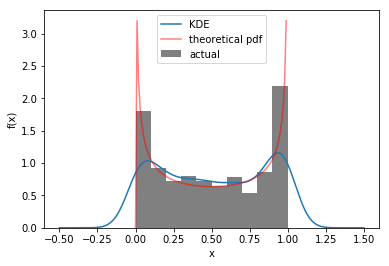

In [12]:
from scipy.stats import arcsine
from math import sqrt
import numpy as np
import pandas as pd
from matplotlib import pylab as plt
from scipy import stats
   
##Выберем наше распределение
arcsine_rv = arcsine()
##Создадим выборку размером 1000
sample_arcsine = arcsine_rv.rvs(1000)

##Получим теоретическую плотность распределения на промежутке 0.00-1.00
x = np.linspace(0.00,0.99, 100)
pdf = arcsine_rv.pdf(x)

#Нарисуем сглашенную функцию плотности распределения
df = pd.DataFrame(sample_arcsine, columns=['KDE'])
df.plot(sample_arcsine, kind = 'density')

#Нарисуем теоретическую плотность распределения
plt.plot(x, pdf, label='theoretical pdf',c='r',alpha=0.5)

#нарисуем гистограмму выборки
plt.hist(sample_arcsine,normed=True,color='grey',label='actual')
plt.legend()
plt.ylabel('f(x)')
plt.xlabel('x')
plt.show()

mean, var, skew, kurt = arcsine.stats(moments='mvsk')
MU = float(mean)
SIGMA = sqrt(var)

In [16]:
print(SIGMA)

0.3535533905932738


In [17]:
##Определим функцию для подсчета выборочных средних
def clt(sample,sub_sample_size):
    means = []
    for i in range(1000):
        sub_sample = sample[np.random.randint(0,len(sample),sub_sample_size)]
        print(sub_sample)
        means.append(np.mean(sub_sample))
        
    mu = np.mean(means)
    sigma = np.std(means,ddof=1)
    SE = SIGMA/sqrt(sub_sample_size) # стандартная ошибка среднего
    
    norm_rv = stats.norm(MU,SE)
    
    print ('Теоретическое среднее vs приближенное: {:.2f} vs {:.2f}'.format(MU,mu))
    print ('Теоретическое стандартное откл. vs приближенное: {:.2f} vs {:.2f}'.format(SE,sigma))
    print ('Приближенное среднее 95% доверительный интервал = {:.2f} +/- {:.2f}'.format(mu,2*SE))
    
    plt.hist(means,normed=True,label='actual')
    plt.plot(x,norm_rv.pdf(x),label='theoretical')
    plt.legend()
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.show()

[ 0.91150364  0.92317514  0.99127257  0.9222876   0.83891321]
[ 0.07787168  0.19825551  0.91152345  0.69078749  0.51605265]
[ 0.96310079  0.30992277  0.18510921  0.9990241   0.99830402]
[ 0.17753101  0.99968108  0.27569479  0.30384573  0.03976487]
[ 0.16666041  0.98189396  0.66048354  0.01502406  0.95938675]
[ 0.98649898  0.93645795  0.64928299  0.4750668   0.93385303]
[ 0.06292065  0.99956991  0.98795958  0.99277859  0.91600073]
[ 0.80653104  0.26423441  0.00873404  0.16960922  0.08683741]
[  7.75371644e-04   6.71188884e-01   8.78107344e-01   4.30442368e-02
   7.76482699e-01]
[ 0.00125293  0.29241932  0.21794244  0.60705503  0.57027506]
[ 0.51627995  0.5927655   0.44722942  0.04593002  0.90115076]
[ 0.26418289  0.02902324  0.47425734  0.75572752  0.51776931]
[  1.18896960e-04   1.39055110e-01   5.83617950e-01   2.47390860e-01
   1.99875315e-01]
[ 0.99283138  0.39503028  0.99772576  0.2939409   0.10913207]
[  1.46150724e-03   8.68982951e-01   5.76169575e-01   3.82555022e-01
   6.279357

[ 0.30798881  0.93432863  0.69890591  0.94218042  0.98980409]
[ 0.99333405  0.54779933  0.03861702  0.00402837  0.00402837]
[ 0.99996665  0.99927821  0.84400765  0.20081434  0.27709928]
[  8.64559307e-01   8.17765792e-01   6.61779113e-04   5.48536591e-01
   7.77897820e-03]
[ 0.00873404  0.44722942  0.26084307  0.67118888  0.00727806]
[ 0.28346366  0.82171493  0.09964737  0.91643546  0.47437054]
[ 0.09407405  0.9998906   0.01777617  0.96346186  0.22212891]
[ 0.92847067  0.91376441  0.14389468  0.8075927   0.93553331]
[ 0.92885685  0.43400742  0.51351985  0.75572752  0.0921255 ]
[ 0.21538651  0.18390904  0.35789732  0.212246    0.20278815]
[ 0.44261955  0.38937631  0.99959752  0.0044161   0.73393942]
[ 0.00468406  0.20633417  0.01406625  0.67422199  0.86376706]
[ 0.77673902  0.52307437  0.91478732  0.91478732  0.83183832]
[  5.26439729e-04   8.07592705e-01   3.01720922e-02   1.48222653e-01
   4.56906813e-02]
[ 0.62899227  0.98470396  0.93385303  0.84393904  0.93135199]
[ 0.65398275  0.95

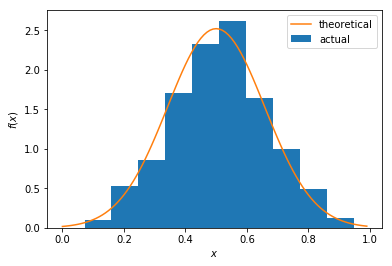

In [18]:
#Распределение выборочного среднего для n=5
clt(sample_arcsine,5)

Теоретическое среднее vs приближенное: 0.50 vs 0.49
Теоретическое стандартное откл. vs приближенное: 0.11 vs 0.11
Приближенное среднее 95% доверительный интервал = 0.49 +/- 0.22


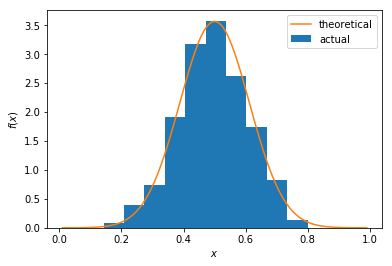

In [11]:
#Распределение выборочного среднего для n=10
clt(sample_arcsine,10)

Теоретическое среднее vs приближенное: 0.50 vs 0.50
Теоретическое стандартное откл. vs приближенное: 0.05 vs 0.05
Приближенное среднее 95% доверительный интервал = 0.50 +/- 0.10


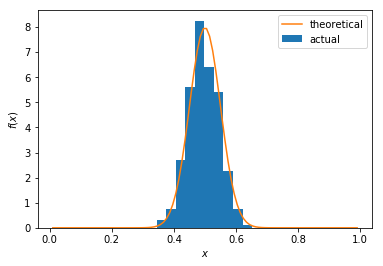

In [12]:
#Распределение выборочного среднего для n=50
clt(sample_arcsine,50)

Теоретическое среднее vs приближенное: 0.50 vs 0.50
Теоретическое стандартное откл. vs приближенное: 0.02 vs 0.02
Приближенное среднее 95% доверительный интервал = 0.50 +/- 0.03


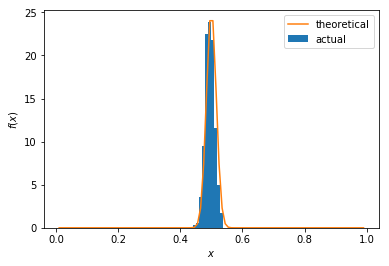

In [13]:
#Распределение выборочного среднего для n=500
clt(sample_arcsine,500)